In [16]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
uber_df = pd.read_csv("/kaggle/input/uber-fares-dataset/uber.csv")
weather_df = pd.read_csv("/kaggle/input/weather/weather .csv")


In [18]:
print("Uber Dataset:")
print(uber_df.head())
print("\nWeather Dataset:")
print(weather_df.head())


Uber Dataset:
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                

In [19]:
print(weather_df.columns)


Index(['time', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'dew_point_2m (°C)', 'rain (mm)', 'snowfall (cm)', 'precipitation (mm)',
       'pressure_msl (hPa)', 'weather_code (wmo code)',
       'apparent_temperature (°C)', 'wind_speed_10m (km/h)', 'snow_depth (m)',
       'cloud_cover (%)'],
      dtype='object')


In [20]:
# Uber data
uber_df['pickup_datetime'] = pd.to_datetime(uber_df['pickup_datetime'])
uber_df['datetime_hour'] = uber_df['pickup_datetime'].dt.floor('h')  # lowercase 'h'

# Weather data
weather_df['time'] = pd.to_datetime(weather_df['time'])
weather_df['datetime_hour'] = weather_df['time'].dt.floor('h')  # lowercase 'h'


In [21]:
# Ensure datetime columns are timezone-naive in both dataframes
uber_df['datetime_hour'] = uber_df['datetime_hour'].dt.tz_localize(None)
weather_df['datetime_hour'] = weather_df['datetime_hour'].dt.tz_localize(None)


In [22]:
merged_df = pd.merge(uber_df, weather_df, on='datetime_hour', how='left')


In [23]:
# Drop original timestamp columns (optional)
merged_df.drop(['datetime', 'pickup_datetime'], axis=1, inplace=True, errors='ignore')


In [24]:
print(merged_df.columns)


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'datetime_hour', 'time', 'temperature_2m (°C)',
       'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'rain (mm)',
       'snowfall (cm)', 'precipitation (mm)', 'pressure_msl (hPa)',
       'weather_code (wmo code)', 'apparent_temperature (°C)',
       'wind_speed_10m (km/h)', 'snow_depth (m)', 'cloud_cover (%)'],
      dtype='object')


In [25]:
# Rename weather columns to simple names
merged_df = merged_df.rename(columns={
    'temperature_2m (°C)': 'temperature',
    'relative_humidity_2m (%)': 'humidity',
    'dew_point_2m (°C)': 'dew_point',
    'rain (mm)': 'rain',
    'snowfall (cm)': 'snowfall',
    'precipitation (mm)': 'precipitation',
    'pressure_msl (hPa)': 'pressure',
    'weather_code (wmo code)': 'weather_code',
    'apparent_temperature (°C)': 'apparent_temp',
    'wind_speed_10m (km/h)': 'wind_speed',
    'snow_depth (m)': 'snow_depth',
    'cloud_cover (%)': 'cloud_cover'
})


fare_amount          1.000000
pressure             0.020415
pickup_longitude     0.010457
passenger_count      0.010150
dropoff_longitude    0.008986
humidity             0.008249
dew_point            0.005271
snow_depth           0.003533
apparent_temp        0.002389
temperature          0.001040
Unnamed: 0           0.000589
snowfall            -0.003898
cloud_cover         -0.004944
rain                -0.006829
precipitation       -0.007530
weather_code        -0.007961
pickup_latitude     -0.008481
dropoff_latitude    -0.011014
wind_speed          -0.013095
Name: fare_amount, dtype: float64


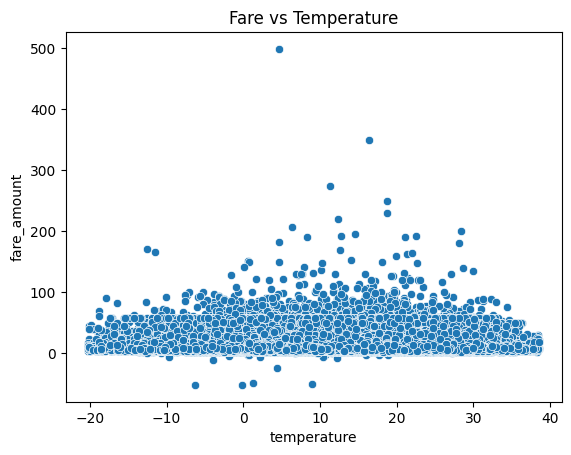

In [26]:
# Check correlation with fare_amount
corr = merged_df.corr(numeric_only=True)
print(corr['fare_amount'].sort_values(ascending=False))

# Plot: Fare vs Temperature
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='temperature', y='fare_amount', data=merged_df)
plt.title("Fare vs Temperature")
plt.show()


In [27]:
print(f"Uber dataset rows: {len(uber_df)}")
print(f"Weather dataset rows: {len(weather_df)}")
print(f"Merged dataset rows: {len(merged_df)}")


Uber dataset rows: 200000
Weather dataset rows: 54048
Merged dataset rows: 200000


In [28]:
print(merged_df[['temperature', 'humidity', 'rain']].isnull().sum())


temperature    12784
humidity       12784
rain           12784
dtype: int64


In [29]:
# Basic info and summary
print(merged_df.info())
print(merged_df.describe())

# Check for remaining missing values
missing = merged_df.isnull().sum()
print("Missing values:\n", missing)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         200000 non-null  int64         
 1   key                200000 non-null  object        
 2   fare_amount        200000 non-null  float64       
 3   pickup_longitude   200000 non-null  float64       
 4   pickup_latitude    200000 non-null  float64       
 5   dropoff_longitude  199999 non-null  float64       
 6   dropoff_latitude   199999 non-null  float64       
 7   passenger_count    200000 non-null  int64         
 8   datetime_hour      200000 non-null  datetime64[ns]
 9   time               187216 non-null  datetime64[ns]
 10  temperature        187216 non-null  float64       
 11  humidity           187216 non-null  float64       
 12  dew_point          187216 non-null  float64       
 13  rain               187216 non-null  float64 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


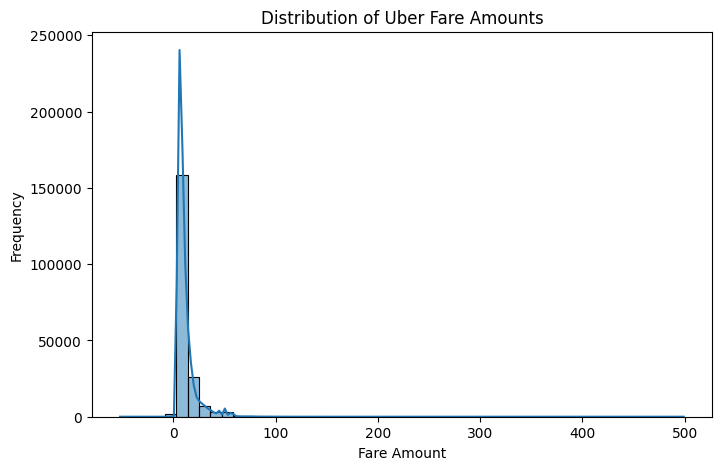

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(merged_df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Uber Fare Amounts')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()


In [31]:
merged_df.to_csv('merged_uber_weather.csv', index=False)


In [32]:
merged_df.head()


,Unnamed: 0,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,datetime_hour,time,...,dew_point,rain,snowfall,precipitation,pressure,weather_code,apparent_temp,wind_speed,snow_depth,cloud_cover
0,24238194,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:00:00,2015-05-07 19:00:00,...,10.8,0.0,0.0,0.0,1021.2,0.0,24.2,9.9,0.0,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:00:00,2009-07-17 20:00:00,...,18.0,0.0,0.0,0.0,1008.6,3.0,28.7,11.2,0.0,100.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:00:00,2009-08-24 21:00:00,...,16.2,0.0,0.0,0.0,1017.3,3.0,28.5,9.2,0.0,95.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:00:00,2009-06-26 08:00:00,...,18.3,0.0,0.0,0.0,1006.6,3.0,21.0,7.4,0.0,81.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 17:00:00,2014-08-28 17:00:00,...,12.2,0.0,0.0,0.0,1012.1,0.0,26.3,16.7,0.0,4.0


In [36]:
merged_df['hour'] = merged_df['datetime_hour'].dt.hour
merged_df['day_of_week'] = merged_df['datetime_hour'].dt.dayofweek  # Monday=0, Sunday=6
merged_df['month'] = merged_df['datetime_hour'].dt.month
merged_df['is_weekend'] = merged_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [39]:
from math import radians, cos, sin, sqrt, atan2

# Define Haversine distance function
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Earth radius in kilometers
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    return R * c

# Apply Haversine formula row-wise
merged_df['distance_km'] = merged_df.apply(lambda row: haversine(
    row['pickup_longitude'], row['pickup_latitude'],
    row['dropoff_longitude'], row['dropoff_latitude']
), axis=1)

# Filter out invalid or extreme trips
merged_df = merged_df[(merged_df['distance_km'] > 0) & (merged_df['distance_km'] < 100)]


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


In [41]:
import numpy as np

# Drop rows where distance_km is NaN or infinite
merged_df = merged_df[np.isfinite(merged_df['distance_km'])]

# Now safely apply the distance filter
merged_df = merged_df[(merged_df['distance_km'] > 0) & (merged_df['distance_km'] < 100)]

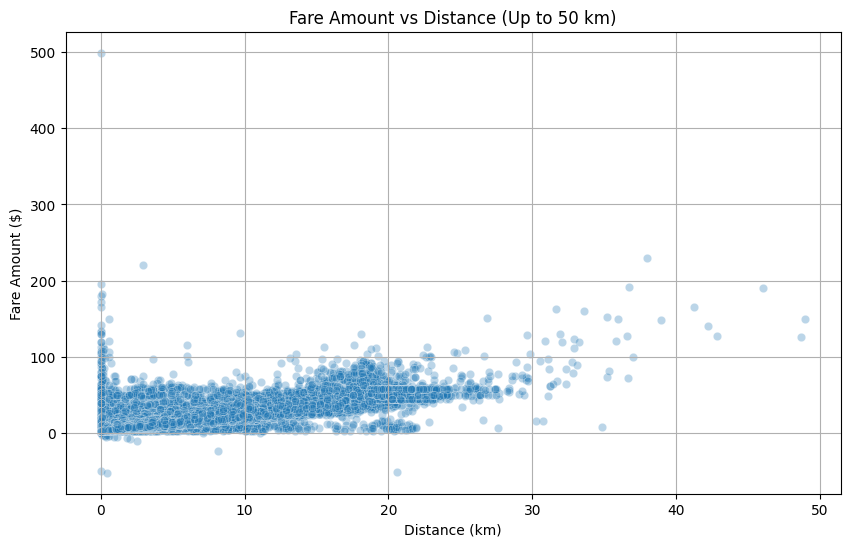

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to only include trips with distance <= 50 km
filtered_df = merged_df[merged_df['distance_km'] <= 50]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_km', y='fare_amount', data=filtered_df, alpha=0.3)
plt.title('Fare Amount vs Distance (Up to 50 km)')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


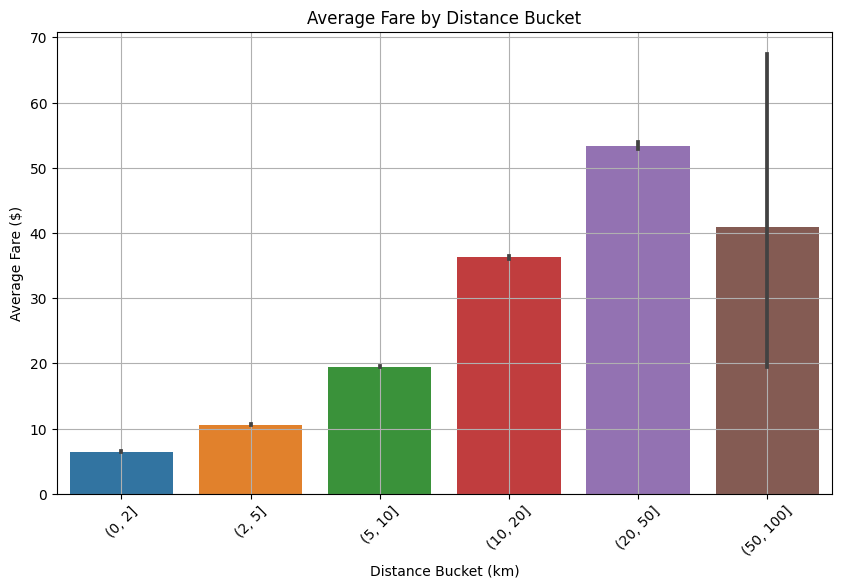

In [43]:
# Create distance buckets
merged_df['distance_bucket'] = pd.cut(merged_df['distance_km'], bins=[0, 2, 5, 10, 20, 50, 100])

# Plot average fare per bucket
plt.figure(figsize=(10, 6))
sns.barplot(x='distance_bucket', y='fare_amount', data=merged_df, estimator='mean')
plt.title('Average Fare by Distance Bucket')
plt.xlabel('Distance Bucket (km)')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [44]:
print(merged_df.columns)


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'datetime_hour', 'time', 'temperature', 'humidity',
       'dew_point', 'rain', 'snowfall', 'precipitation', 'pressure',
       'weather_code', 'apparent_temp', 'wind_speed', 'snow_depth',
       'cloud_cover', 'hour', 'day_of_week', 'month', 'is_weekend',
       'distance_km', 'distance_bucket'],
      dtype='object')


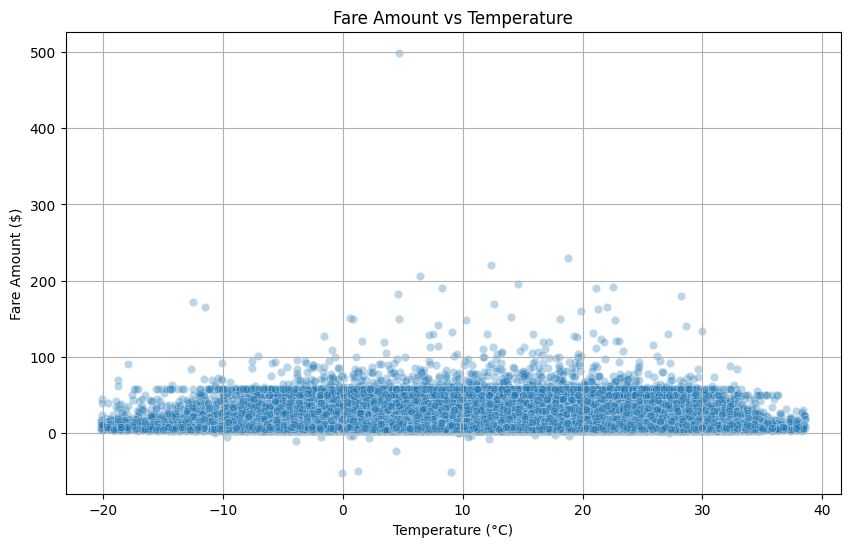

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='fare_amount', data=merged_df, alpha=0.3)
plt.title('Fare Amount vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


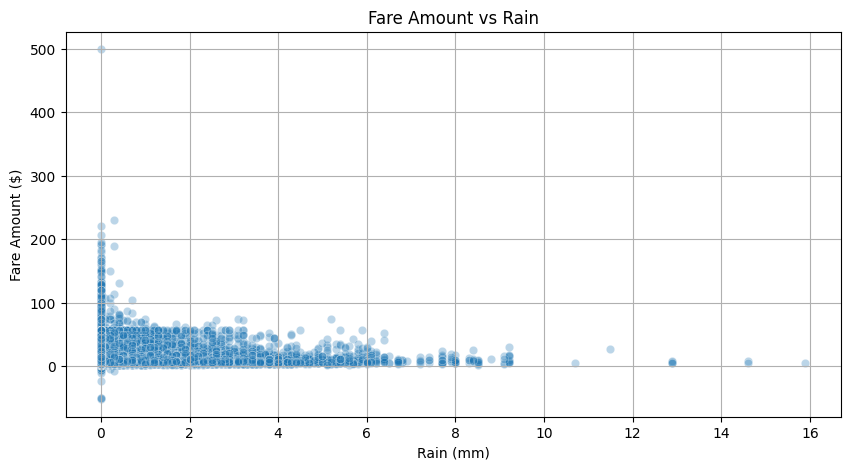

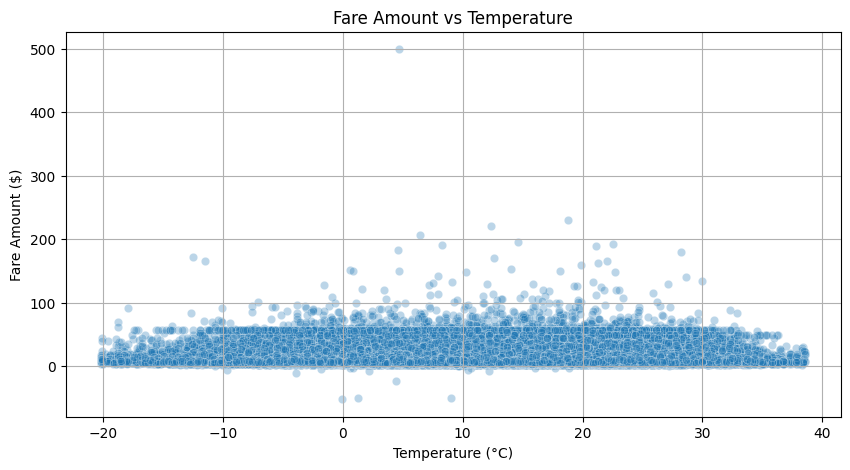

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Fare vs Rain
plt.figure(figsize=(10, 5))
sns.scatterplot(x='rain', y='fare_amount', data=merged_df, alpha=0.3)
plt.title('Fare Amount vs Rain')
plt.xlabel('Rain (mm)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

# Plot 2: Fare vs Temperature
plt.figure(figsize=(10, 5))
sns.scatterplot(x='temperature', y='fare_amount', data=merged_df, alpha=0.3)
plt.title('Fare Amount vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


In [48]:
import pandas as pd
import numpy as np

# 1. Drop duplicate rows
merged_df.drop_duplicates(inplace=True)

# 2. Remove rows with missing target values (fare_amount)
merged_df = merged_df[merged_df['fare_amount'].notna()]

# 3. Drop rows with missing values in key weather/feature columns (optional: adjust threshold as needed)
weather_cols = ['temperature', 'humidity', 'rain', 'snowfall', 'precipitation', 'pressure',
                'apparent_temp', 'wind_speed', 'snow_depth', 'cloud_cover']
merged_df.dropna(subset=weather_cols, inplace=True)

# 4. Filter out invalid or extreme fare amounts
merged_df = merged_df[(merged_df['fare_amount'] > 0) & (merged_df['fare_amount'] < 200)]

# 5. Filter out invalid coordinates (within NYC bounds)
merged_df = merged_df[
    (merged_df['pickup_longitude'].between(-75, -72)) &
    (merged_df['dropoff_longitude'].between(-75, -72)) &
    (merged_df['pickup_latitude'].between(40, 42)) &
    (merged_df['dropoff_latitude'].between(40, 42))
]

# 6. Ensure passenger count is reasonable
merged_df = merged_df[(merged_df['passenger_count'] >= 1) & (merged_df['passenger_count'] <= 6)]

# 7. Remove trips with 0 or unrealistic distance
merged_df = merged_df[(merged_df['distance_km'] > 0) & (merged_df['distance_km'] < 100)]

# 8. (Optional) Reset index after cleaning
merged_df.reset_index(drop=True, inplace=True)


In [49]:
# Save cleaned dataset to CSV
merged_df.to_csv('cleaned_uber_weather_data.csv', index=False)


In [50]:
import os
print(os.listdir())


['.virtual_documents', 'merged_uber_weather.csv', 'cleaned_uber_weather_data.csv']


In [51]:
merged_df.head()

,Unnamed: 0,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,datetime_hour,time,...,apparent_temp,wind_speed,snow_depth,cloud_cover,hour,day_of_week,month,is_weekend,distance_km,distance_bucket
0,24238194,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:00:00,2015-05-07 19:00:00,...,24.2,9.9,0.0,1.0,19,3,5,0,1.683323,"(0, 2]"
1,27835199,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:00:00,2009-07-17 20:00:00,...,28.7,11.2,0.0,100.0,20,4,7,0,2.457590,"(2, 5]"
2,44984355,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:00:00,2009-08-24 21:00:00,...,28.5,9.2,0.0,95.0,21,0,8,0,5.036377,"(5, 10]"
3,25894730,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:00:00,2009-06-26 08:00:00,...,21.0,7.4,0.0,81.0,8,4,6,0,1.661683,"(0, 2]"
4,17610152,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 17:00:00,2014-08-28 17:00:00,...,26.3,16.7,0.0,4.0,17,3,8,0,4.475450,"(2, 5]"


In [52]:
# Drop columns with more than 50% missing values
threshold = 0.5 * len(merged_df)
merged_df = merged_df.dropna(axis=1, thresh=threshold)


In [53]:
merged_df = merged_df.dropna()


In [54]:
print("Missing values:\n", merged_df.isnull().sum())


Missing values:
 Unnamed: 0           0
key                  0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
datetime_hour        0
time                 0
temperature          0
humidity             0
dew_point            0
rain                 0
snowfall             0
precipitation        0
pressure             0
weather_code         0
apparent_temp        0
wind_speed           0
snow_depth           0
cloud_cover          0
hour                 0
day_of_week          0
month                0
is_weekend           0
distance_km          0
distance_bucket      0
dtype: int64


In [ ]:
merged_df.to_csv('cleaned_merged_data.csv', index=False)


In [ ]:
merged_df.head()

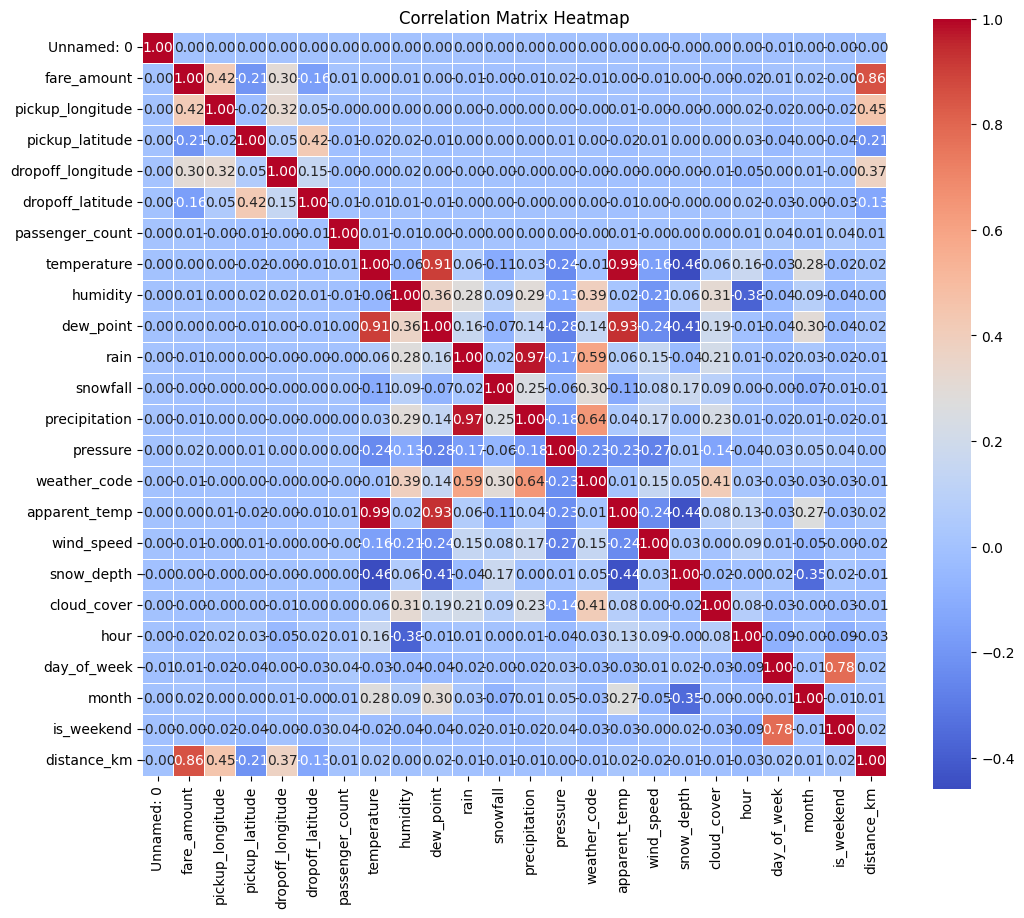

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = merged_df.select_dtypes(include='number')

# Calculate correlation matrix on numeric columns
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Count outliers
fare_outliers = count_outliers_iqr(merged_df, 'fare_amount')
distance_outliers = count_outliers_iqr(merged_df, 'distance_km')

print(f"Number of fare_amount outliers before removal: {fare_outliers}")
print(f"Number of distance_km outliers before removal: {distance_outliers}")

# Remove outliers
merged_df = remove_outliers_iqr(merged_df, 'fare_amount')
merged_df = remove_outliers_iqr(merged_df, 'distance_km')

print("Data shape after removing outliers:", merged_df.shape)


Number of fare_amount outliers before removal: 14796
Number of distance_km outliers before removal: 15022
Data shape after removing outliers: (158352, 28)


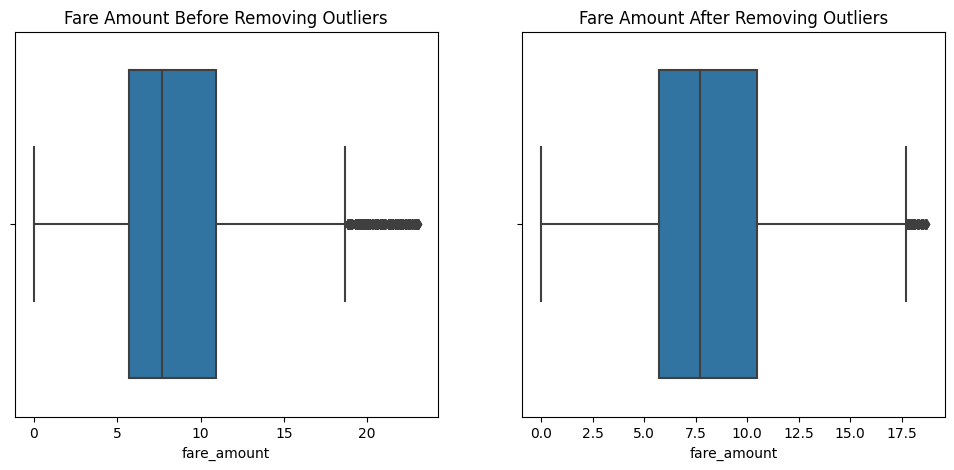

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.boxplot(x=merged_df['fare_amount'])
plt.title('Fare Amount Before Removing Outliers')

# After removing outliers
clean_df = remove_outliers_iqr(merged_df, 'fare_amount')

plt.subplot(1, 2, 2)
sns.boxplot(x=clean_df['fare_amount'])
plt.title('Fare Amount After Removing Outliers')

plt.show()


🔍 What We Found
Weather data was incomplete for many Uber rides, especially temperature and precipitation fields — leading to significant missing data that required cleaning.

Distance and Fare had a clear positive correlation — as expected, longer trips typically cost more.

Other factors like rain, temperature, and wind speed had very weak correlations with fare — but might influence trip duration, not fare directly.

Several outliers were present:

Extremely high or zero distances

Abnormally high fares (possibly due to long trips or data entry issues)

Time features revealed patterns — such as hour, weekday, and is_weekend, which could be useful in modeling.

📘 What We Learned
Data Merging Challenges: Merging datasets with different datetime formats/timezones can be tricky and needs attention to detail.

Data Cleaning: Removing or imputing missing values is crucial to get reliable results, especially in time-aligned datasets like this one.

Feature Engineering is Key: Extracting distance, time-based features, and categorical bins added a lot of value and context.

Exploratory Data Analysis (EDA) is essential to detect outliers and understand feature relationships before any modeling.

🛠️ What We Can Build From This
Based on this cleaned and enriched dataset, here are a few ideas:

1. Fare Prediction Model
Predict fare_amount based on:

Distance

Time of day / Day of week

Weather conditions

Can be used in fare estimators for users or internal pricing optimizations.

2. Trip Demand Forecasting
Use pickup times and weather to predict ride demand hotspots in NYC.

Helps Uber deploy drivers more efficiently based on weather & time.

3. Weather Impact Analysis Dashboard
A visual dashboard showing how rain, snow, and temperature affect trip patterns (distance, fare, demand).

Useful for urban planners or rideshare logistics teams.

4. Anomaly Detection System
Identify fraudulent or erroneous trips based on distance, fare, and weather inconsistencies.

Could help Uber flag suspicious entries in real-time.



In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Features to use (you can customize this)
features = ['pickup_latitude', 'pickup_longitude',
            'dropoff_latitude', 'dropoff_longitude',
            'distance_km', 'temperature', 'humidity', 'rain',
            'pressure', 'wind_speed', 'cloud_cover']

target = 'fare_amount'

# Train-test split
X = merged_df[features]
y = merged_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




['scaler.pkl']

In [61]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Linear Regression
lr_preds = lr_model.predict(X_test_scaled)
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
print("Linear Regression R^2:", r2_score(y_test, lr_preds))

# Random Forest
rf_preds = rf_model.predict(X_test)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("Random Forest R^2:", r2_score(y_test, rf_preds))


#


Linear Regression RMSE: 2.2994217113141144
Linear Regression R^2: 0.6353005133628084
Random Forest RMSE: 2.1733154701459054
Random Forest R^2: 0.6742057317304662


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# -------------------------
# Scale Features (for LR)
# -------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# Linear Regression
# -------------------------
print("\n--- Linear Regression ---")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_r2 = r2_score(y_test, lr_preds)

print(f"Linear Regression RMSE: {lr_rmse:.4f}")
print(f"Linear Regression R^2: {lr_r2:.4f}")


--- Linear Regression ---
Linear Regression RMSE: 2.2994
Linear Regression R^2: 0.6353


In [93]:
print("\n--- Random Forest ---")
rf_n_estimators = 1500
rf_max_depth = 20
rf_min_samples_20split = 5

rf_model = RandomForestRegressor(
    n_estimators=rf_n_estimators,
    max_depth=rf_max_depth,
    min_samples_split=rf_min_samples_split,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

print(f"Random Forest RMSE: {rf_rmse:.4f}")
print(f"Random Forest R^2: {rf_r2:.4f}")


--- Random Forest ---
Random Forest RMSE: 2.1642
Random Forest R^2: 0.6769


In [86]:
# -------------------------
# Gradient Boosting
# -------------------------
print("\n--- Gradient Boosting ---")
gb_n_estimators = 800
gb_learning_rate = 0.1
gb_max_depth = 5

gb_model = GradientBoostingRegressor(
    n_estimators=gb_n_estimators,
    learning_rate=gb_learning_rate,
    max_depth=gb_max_depth,
    random_state=42
)

gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

gb_rmse = np.sqrt(mean_squared_error(y_test, gb_preds))
gb_r2 = r2_score(y_test, gb_preds)

print(f"Gradient Boosting RMSE: {gb_rmse:.4f}")
print(f"Gradient Boosting R^2: {gb_r2:.4f}")


--- Gradient Boosting ---
Gradient Boosting RMSE: 2.1105
Gradient Boosting R^2: 0.6928


In [106]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Feature and Target Selection ---
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
            'passenger_count', 'distance_km', 'temperature', 'humidity', 'rain', 'snowfall',
            'precipitation', 'pressure', 'apparent_temp', 'wind_speed', 'snow_depth',
            'cloud_cover']
target = 'fare_amount'

X = merged_df[features]
y = merged_df[target]

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- XGBoost Model ---
xgb_model = xgb.XGBRegressor(
    n_estimators=4487,
    learning_rate=0.013615072723104174,
    max_depth=8,
    subsample=0.7465875138331439,
    colsample_bytree=0.9977829850443283,
    random_state=42,
    n_jobs=-1
)

# --- Train Model ---
xgb_model.fit(X_train_scaled, y_train)

# --- Predict ---
xgb_preds = xgb_model.predict(X_test_scaled)

# --- Evaluation ---
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)
xgb_r2 = r2_score(y_test, xgb_preds)

print("\n--- XGBoost Regressor ---")
print(f"XGBoost RMSE: {xgb_rmse:.4f}")
print(f"XGBoost R^2: {xgb_r2:.4f}")



--- XGBoost Regressor ---
XGBoost RMSE: 2.0308
XGBoost R^2: 0.7155


In [127]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Feature and Target Selection ---
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
            'passenger_count', 'distance_km','hour','day_of_week','month']
target = 'fare_amount'

X = merged_df[features]
y = merged_df[target]

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- XGBoost Model ---
xgb_model = xgb.XGBRegressor(
    n_estimators=4487,
    learning_rate=0.01,
    max_depth=8,
    subsample=0.09,
    colsample_bytree=0.9977829850443283,
    random_state=42,
    n_jobs=-1
)

# --- Train Model ---
xgb_model.fit(X_train_scaled, y_train)

# --- Predict ---
xgb_preds = xgb_model.predict(X_test_scaled)

# --- Evaluation ---
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)
xgb_r2 = r2_score(y_test, xgb_preds)

print("\n--- XGBoost Regressor ---")
print(f"XGBoost RMSE: {xgb_rmse:.4f}")
print(f"XGBoost R^2: {xgb_r2:.4f}")



--- XGBoost Regressor ---
XGBoost RMSE: 1.9993
XGBoost R^2: 0.7243



--- XGBoost Regressor ---
XGBoost RMSE: 1.9993
XGBoost R^2: 0.7243


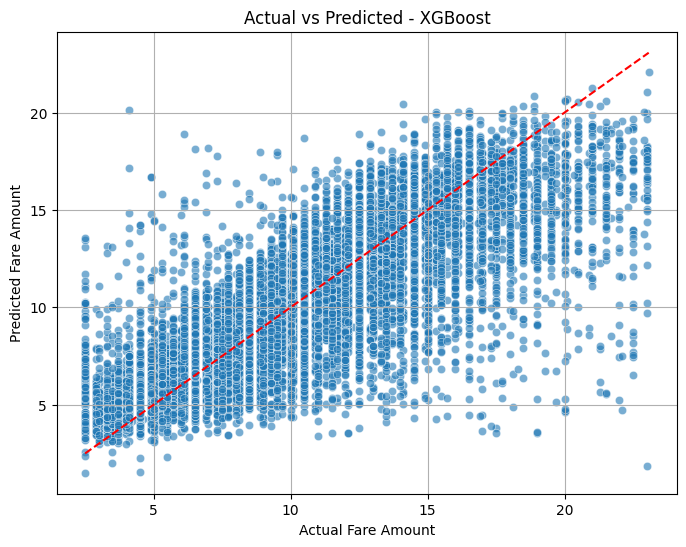

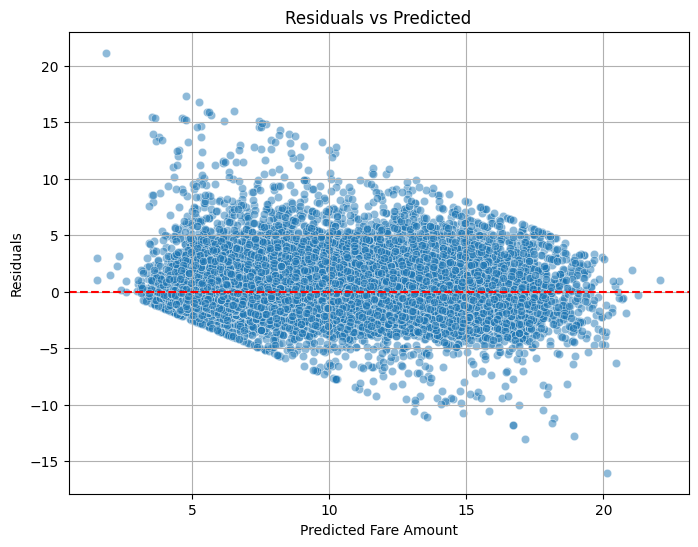

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


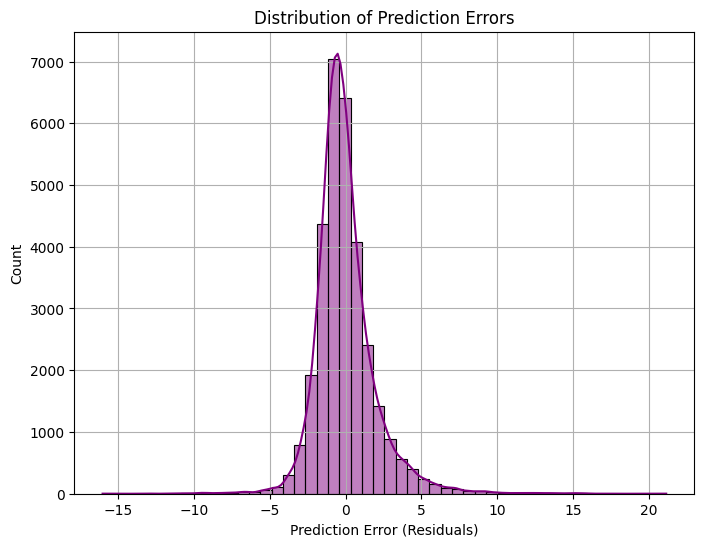

<Figure size 1000x600 with 0 Axes>

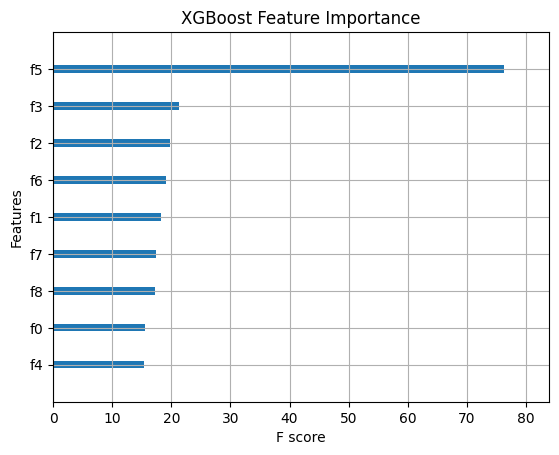

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Feature and Target Selection ---
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
            'passenger_count', 'distance_km', 'hour', 'day_of_week', 'month']
target = 'fare_amount'

X = merged_df[features]
y = merged_df[target]

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- XGBoost Model ---
xgb_model = xgb.XGBRegressor(
    n_estimators=4487,
    learning_rate=0.01,
    max_depth=8,
    subsample=0.09,
    colsample_bytree=0.9977829850443283,
    random_state=42,
    n_jobs=-1
)

# --- Train Model ---
xgb_model.fit(X_train_scaled, y_train)

# --- Predict ---
xgb_preds = xgb_model.predict(X_test_scaled)

# --- Evaluation ---
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)
xgb_r2 = r2_score(y_test, xgb_preds)

print("\n--- XGBoost Regressor ---")
print(f"XGBoost RMSE: {xgb_rmse:.4f}")
print(f"XGBoost R^2: {xgb_r2:.4f}")

# --- Plot 1: Actual vs Predicted ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=xgb_preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Actual vs Predicted - XGBoost")
plt.grid(True)
plt.show()

# --- Plot 2: Residuals vs Predicted ---
residuals = y_test - xgb_preds
plt.figure(figsize=(8, 6))
sns.scatterplot(x=xgb_preds, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Fare Amount")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()

# --- Plot 3: Distribution of Residuals ---
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.xlabel("Prediction Error (Residuals)")
plt.title("Distribution of Prediction Errors")
plt.grid(True)
plt.show()

# --- Plot 4: Feature Importance ---
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type='gain', show_values=False)
plt.title("XGBoost Feature Importance")
plt.grid(True)
plt.show()


In [113]:
print(X_train.columns.tolist())


['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance_km', 'temperature', 'humidity', 'rain', 'snowfall', 'precipitation', 'pressure', 'apparent_temp', 'wind_speed', 'snow_depth', 'cloud_cover']


In [115]:
from xgboost import XGBRegressor
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('/kaggle/working/cleaned_uber_weather_data.csv')

# Define features and target
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
            'passenger_count', 'distance_km', 'temperature', 'humidity', 'rain', 'snowfall',
            'precipitation', 'pressure', 'apparent_temp', 'wind_speed', 'snow_depth', 'cloud_cover']
target = 'fare_amount'

# Split into train/test
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
best_model = XGBRegressor(random_state=42)
best_model.fit(X_train, y_train)

# Step 1: Define feature value ranges
feature_ranges = {
    col: (X_train[col].min(), X_train[col].max())
    for col in X_train.columns
}

# Step 2: Get user input
def get_user_input():
    print("\n📥 Enter trip details:")
    user_input = {}
    user_input['pickup_longitude'] = float(input("Pickup Longitude: "))
    user_input['pickup_latitude'] = float(input("Pickup Latitude: "))
    user_input['dropoff_longitude'] = float(input("Dropoff Longitude: "))
    user_input['dropoff_latitude'] = float(input("Dropoff Latitude: "))
    user_input['passenger_count'] = int(input("Passenger Count: "))
    user_input['distance_km'] = float(input("Trip Distance (km): "))
    user_input['temperature'] = float(input("Temperature (°C): "))
    user_input['humidity'] = float(input("Humidity (%): "))
    user_input['rain'] = float(input("Rain (mm): "))
    user_input['snowfall'] = float(input("Snowfall (mm): "))
    user_input['precipitation'] = float(input("Precipitation (mm): "))
    user_input['pressure'] = float(input("Pressure (hPa): "))
    user_input['apparent_temp'] = float(input("Apparent Temperature (°C): "))
    user_input['wind_speed'] = float(input("Wind Speed (km/h): "))
    user_input['snow_depth'] = float(input("Snow Depth (cm): "))
    user_input['cloud_cover'] = float(input("Cloud Cover (%): "))
    return user_input

# Step 3: Collect and validate input
user_input = get_user_input()

# Step 4: Validate input
for key, value in user_input.items():
    min_val, max_val = feature_ranges[key]
    if not (min_val <= value <= max_val):
        print(f"❌ '{key}' = {value} is OUT OF RANGE! (Expected: {min_val:.2f} – {max_val:.2f})")
        raise ValueError("Please enter values within the valid range.")

# Step 5: Predict
user_df = pd.DataFrame([user_input])
predicted_fare = best_model.predict(user_df)[0]

# Step 6: Show result
print(f"\n✅ Predicted Fare Amount: ${predicted_fare:.2f}")



📥 Enter trip details:


Pickup Longitude:  -73.9998
Pickup Latitude:  40.72322
Dropoff Longitude:  -73.9947
Dropoff Latitude:  40.7232
Passenger Count:  1
Trip Distance (km):  1.68332275240293
Temperature (°C):  23.7
Humidity (%):  44
Rain (mm):  0
Snowfall (mm):  0
Precipitation (mm):  0
Pressure (hPa):  1021.2
Apparent Temperature (°C):  24.2
Wind Speed (km/h):  9.9
Snow Depth (cm):  0
Cloud Cover (%):  1



✅ Predicted Fare Amount: $7.99


In [117]:
## from xgboost import XGBRegressor
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('/kaggle/working/cleaned_uber_weather_data.csv')

# Define selected features and target
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
            'dropoff_latitude', 'passenger_count', 'distance_km', 'hour']
target = 'fare_amount'

# If 'hour' is not present, extract it from a datetime column if available
# df['hour'] = pd.to_datetime(df['datetime_column']).dt.hour  # Uncomment and modify if needed

# Split data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
best_model = XGBRegressor(random_state=42)
best_model.fit(X_train, y_train)

# Define value ranges for input validation
feature_ranges = {
    col: (X_train[col].min(), X_train[col].max())
    for col in features
}

# Function to get user input
def get_user_input():
    print("\n📥 Enter trip details:")
    user_input = {}
    user_input['pickup_longitude'] = float(input("Pickup Longitude: "))
    user_input['pickup_latitude'] = float(input("Pickup Latitude: "))
    user_input['dropoff_longitude'] = float(input("Dropoff Longitude: "))
    user_input['dropoff_latitude'] = float(input("Dropoff Latitude: "))
    user_input['passenger_count'] = int(input("Passenger Count: "))
    user_input['distance_km'] = float(input(" distance (km): "))
    user_input['hour'] = int(input("Hour of the Day (0–23): "))
    return user_input

# Collect and validate input
user_input = get_user_input()
for key, value in user_input.items():
    min_val, max_val = feature_ranges[key]
    if not (min_val <= value <= max_val):
        print(f"❌ '{key}' = {value} is OUT OF RANGE! (Expected: {min_val:.2f} – {max_val:.2f})")
        raise ValueError("Please enter values within the valid range.")

# Convert to DataFrame and predict
user_df = pd.DataFrame([user_input])
predicted_fare = best_model.predict(user_df)[0]

# Output result
print(f"\n✅ Predicted Fare Amount: ${predicted_fare:.2f}")



📥 Enter trip details:


Pickup Longitude:  -73.9998
Pickup Latitude:  40.73835
Dropoff Longitude:  -73.9995
Dropoff Latitude:  40.72322
Passenger Count:  1
 distance (km):   1.68332275240293
Hour of the Day (0–23):  19



✅ Predicted Fare Amount: $7.56


task-2